<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/Churn_clasifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preveja os usuários com alta chance de deixar seu Streaming


In [135]:
#importamos as bibliotecas necesarias para manipulação, tratativa, clasificação e para medir as nosas metricas

#tratativa de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import requests
from io import StringIO
import seaborn as sns


#medição de metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score


#modelo de ML|RN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


In [136]:
pip install scikit-learn


In [137]:
df= pd.read_csv('/content/streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [139]:
df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


In [140]:
#Posivelmente esta variavel nao afete muito a nossa analise, igual aqui apresento uma opcao para resolver este problema
'''
generos = ['Male', 'Female']

df['Gender'] = df['Gender'].apply(lambda x: np.random.choice(generos) if pd.isna(x) else x)
'''

"\ngeneros = ['Male', 'Female']\n\ndf['Gender'] = df['Gender'].apply(lambda x: np.random.choice(generos) if pd.isna(x) else x)\n"

In [141]:
df['Avg_rating'].fillna(0, inplace=True)

df['Num_streaming_services'].fillna(0, inplace=True)

df['Devices_connected'].fillna(0,inplace=True)

df['Time_on_platform'].fillna(0,inplace=True)

df['Churned'].fillna(0,inplace=True)



In [142]:
df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,0
Devices_connected,0
Subscription_type,25221
Num_streaming_services,0
Num_active_profiles,0
Avg_rating,0
Churned,0
User_id,0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        77884 non-null  float64
 3   Devices_connected       77884 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  77884 non-null  float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              77884 non-null  float64
 8   Churned                 77884 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [144]:
# Ver la distribución de valores en una columna después de la imputación
print(df['Gender'].value_counts())
print(df['Subscription_type'].value_counts())

Gender
Male      31796
Female    31572
Name: count, dtype: int64
Subscription_type
Premium     17625
Basic       17527
Standard    17511
Name: count, dtype: int64


In [145]:
df['Churned'].value_counts()

,count
Churned,
0.0,63021
1.0,14863


In [146]:
# Eliminar nulos por columna individualmente y observar el efecto en los datos
#df = df.dropna(subset=['Gender'])
#df = df.dropna(subset=['Subscription_type'])
#df = df.dropna(subset=['Age'])
df.dropna(inplace=True)

In [147]:
# Convertir todas las columnas float a int
df = df.astype({'Time_on_platform': 'int', 'Devices_connected': 'int','Num_streaming_services':'int','Avg_rating':'int','Age':'int','Churned':'int'})

In [148]:
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'yes'})

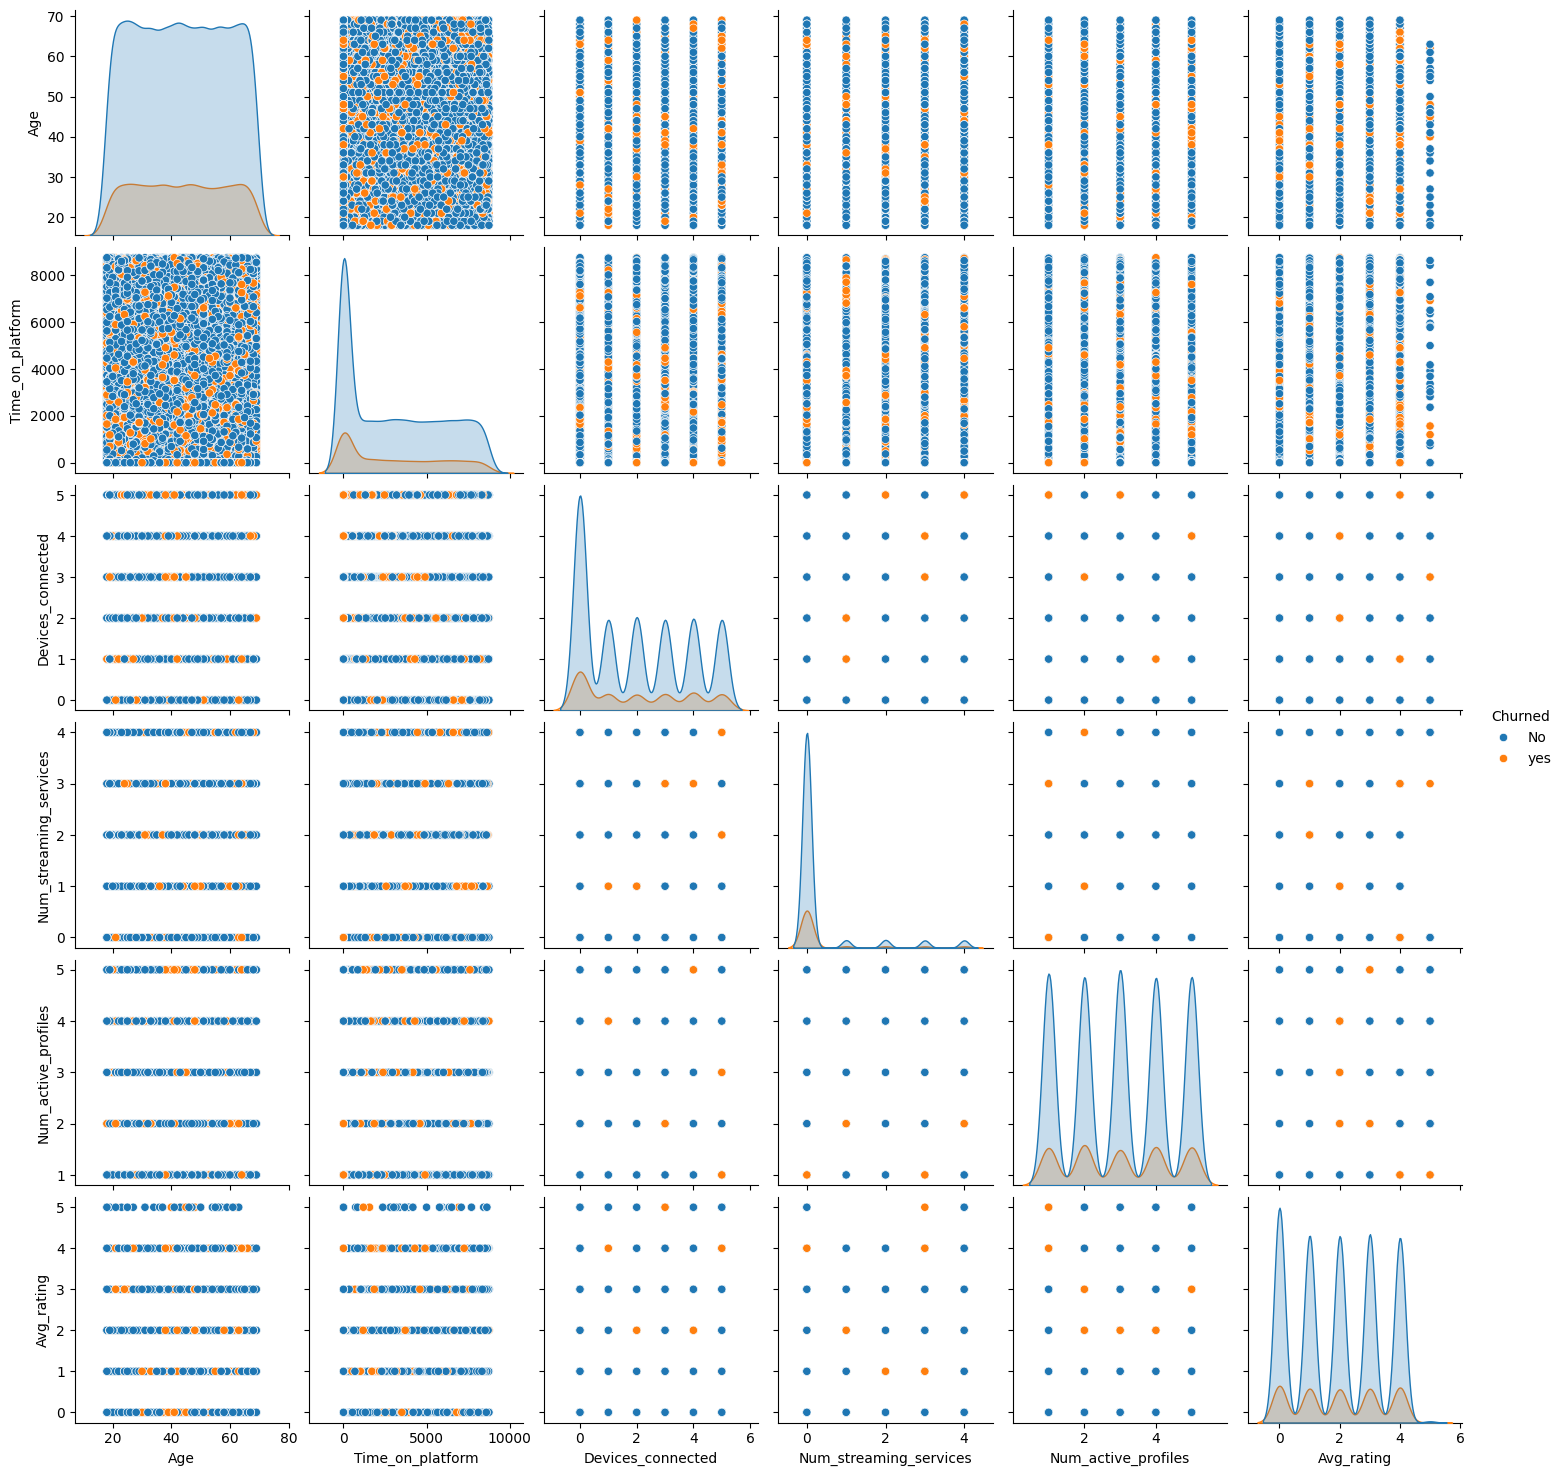

In [149]:
# Crear pair plot
sns.pairplot(df, hue='Churned', diag_kind='kde')
plt.show()

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


In [151]:
df['Churned'].value_counts()

,count
Churned,
No,29459
yes,7056


In [152]:
X = df.drop(columns=["User_id","Churned"], axis=1)

y = df[["Churned"]]

In [153]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churned)
y.Churned = le.transform(y.Churned)

<ipython-input-153-5f8333b3523b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churned = le.transform(y.Churned)


In [154]:
X = pd.get_dummies(X)

In [155]:
# Import the necessary sklearn method

# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [157]:


model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [158]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [159]:

X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
4039,0.666667,0.000000,0.8,0.0,0.25,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0
13646,0.725490,0.000000,0.2,0.0,0.25,0.4,1.0,0.0,1.0,0.0,0.0,NaN,0
35203,0.098039,0.000000,0.8,0.0,0.00,0.0,1.0,0.0,0.0,1.0,0.0,NaN,0
19960,0.411765,0.436123,0.6,0.0,1.00,0.8,1.0,0.0,1.0,0.0,0.0,NaN,0
17479,0.784314,0.343190,0.8,0.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,0.215686,0.007535,1.0,0.0,0.25,0.6,0.0,1.0,0.0,1.0,0.0,NaN,0
33935,0.254902,0.868250,0.0,0.0,0.50,0.2,1.0,0.0,0.0,0.0,1.0,NaN,0
30804,0.568627,0.438406,0.0,0.0,1.00,0.2,1.0,0.0,0.0,1.0,0.0,NaN,0
15355,0.784314,0.841192,1.0,0.0,0.25,0.6,1.0,0.0,0.0,1.0,0.0,NaN,0


In [160]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

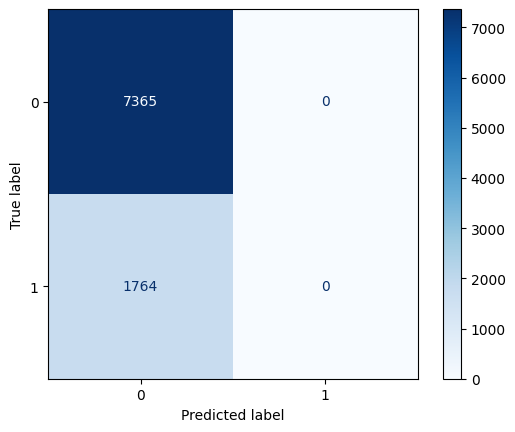

In [161]:
'''
cm = confusion_matrix(y_true, y_pred) # Assuming you have y_true and y_pred
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

'''
# Graficar la matriz de confusión
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.show()

In [174]:
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")


Acurácia (Treino): 0.8067625794201416
Acurácia (Teste): 0.8067696352283931
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5128111653218663
ROCAUC (Teste): 0.49816069446561156


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [162]:
# Evaluar el rendimiento del modelo
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[7365    0]
 [1764    0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      7365
           1       0.00      0.00      0.00      1764

    accuracy                           0.81      9129
   macro avg       0.40      0.50      0.45      9129
weighted avg       0.65      0.81      0.72      9129



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))


Precisión del modelo:
0.8067696352283931


In [165]:

rf =  RandomForestClassifier()

rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [166]:

rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [168]:
X_test.assign(churned = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churned,label
4039,0.666667,0.000000,0.8,0.0,0.25,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0
13646,0.725490,0.000000,0.2,0.0,0.25,0.4,1.0,0.0,1.0,0.0,0.0,NaN,0
35203,0.098039,0.000000,0.8,0.0,0.00,0.0,1.0,0.0,0.0,1.0,0.0,NaN,0
19960,0.411765,0.436123,0.6,0.0,1.00,0.8,1.0,0.0,1.0,0.0,0.0,NaN,0
17479,0.784314,0.343190,0.8,0.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,0.215686,0.007535,1.0,0.0,0.25,0.6,0.0,1.0,0.0,1.0,0.0,NaN,0
33935,0.254902,0.868250,0.0,0.0,0.50,0.2,1.0,0.0,0.0,0.0,1.0,NaN,0
30804,0.568627,0.438406,0.0,0.0,1.00,0.2,1.0,0.0,0.0,1.0,0.0,NaN,0
15355,0.784314,0.841192,1.0,0.0,0.25,0.6,1.0,0.0,0.0,1.0,0.0,NaN,0


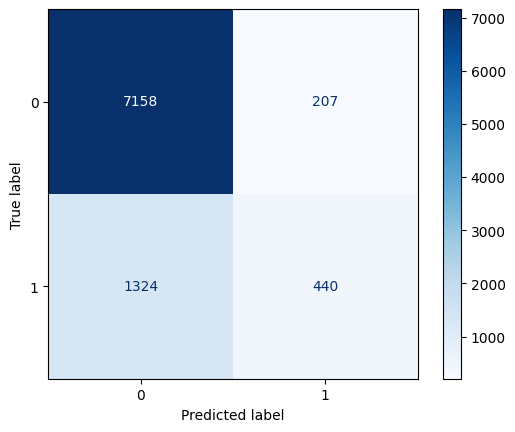

In [171]:
y_pred = rf.predict(X_test)  # Predict labels for the test set

# Create the confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap=plt.cm.Blues, values_format='d')

# Display the plot
plt.show()

In [172]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9946322938727817
Acurácia (Teste): 0.8322926936137583
Acurácia Balanceada (Treino): 0.9895599907383973
Acurácia Balanceada (Teste): 0.6106636001311591
Precision (Treino): 0.9908414424728106
Precision (Teste): 0.6800618238021638
Recall (Treino): 0.9812925170068028
Recall (Teste): 0.2494331065759637
F1-Score (Treino): 0.9860438621475363
F1-Score (Teste): 0.364993778515139
ROCAUC (Treino): 0.9997231004186674
ROCAUC (Teste): 0.6729321667567232
